This report explores a dataset containing information about ice cream sales and builds a predictive model that can accurately predict sales. 

The aim is to identify key trends and patterns within this data. In addition, it looks to apply machine learning algorithms to create a model to predict ice cream sales. 

For this, we will be implementing the following libraries:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rc("font", family="monospace", weight="bold", size=9)

The train data set contains two colums. first column contains the quantitative values for Temperature, and the second column holds the quantitative values for Number of Ice Cream Sold. Shown in figure bellow.

In [7]:
columns = ["Temperature", "Icecream"]
df = pd.read_fwf('train.txt', header=None, names=columns)
print(df)

     Temperature   Icecream
0       0.000000   4.456329
1       0.037737   3.301815
2       0.075474   3.595955
3       0.113211   3.401495
4       0.150947   4.571147
..           ...        ...
795    30.000795  10.928634
796    30.038532  10.106108
797    30.076268  10.521322
798    30.114005   9.814676
799    30.151742  11.364662

[800 rows x 2 columns]


The independent variable of this dataset is Temperature, and the response is Ice Cream sold. The visual representation of Temperature v Ice Cream shows a positive relationship between the Temperature and Ice Cream sold.
As the temperature increases the amount of Ice cream sold also increases.

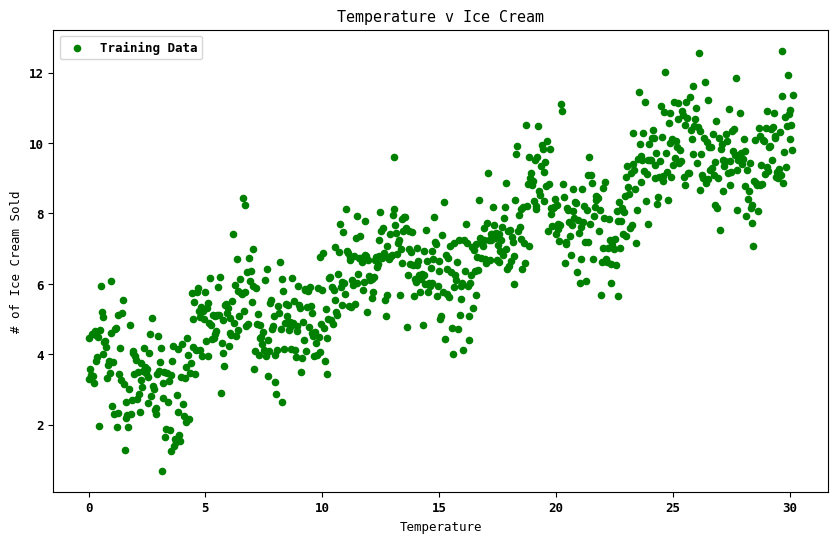

In [8]:

columns = ["Temperature", "Icecream"]
df = pd.read_fwf('train.txt', header=None, names=columns)

fig, ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax, x='Temperature', y='Icecream', color='green', s=20,  marker='o', label='Training Data', kind='scatter');

ax.set_ylabel('# of Ice Cream Sold')
ax.set_title('Temperature v Ice Cream');

based off the plot lets assume there is a linear relationship between Temperature and Ice cream. Because of this assumption we will design our model based on linear regression. 𝑓-hat(x) = β̂0 + β̂1x. β needs to be minimized to get and accurate representation of f, the true function. This is done by estimating β. To do get the estimate I fit the data Temperature (X_train) and Ice cream(y_train) to the linearRegression model. Since it is linear the only values we need to find is the intercept β̂0, and the coefficient of x, β̂1. 

In [9]:
X_train = df["Temperature"].to_numpy()
y_train = df["Icecream"].to_numpy()

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

beta0_hat = model.intercept_
beta1_hat = model.coef_[0]

print(f'β̂0 (Slope): {beta0_hat} ) \nβ̂1 (Intercept): {beta1_hat} )')

β̂0 (Slope): 3.191037800253056 ) 
β̂1 (Intercept): 0.238397630459365 )


Those are my estimates for the linear regression model. These values are the optimal values of beta for the function 𝑓-hat with respects to our predictior Temperature, that gets the predicted values vector y-hat ≈ y. Bellow is a graph of the linear regression line 𝑓-hat.

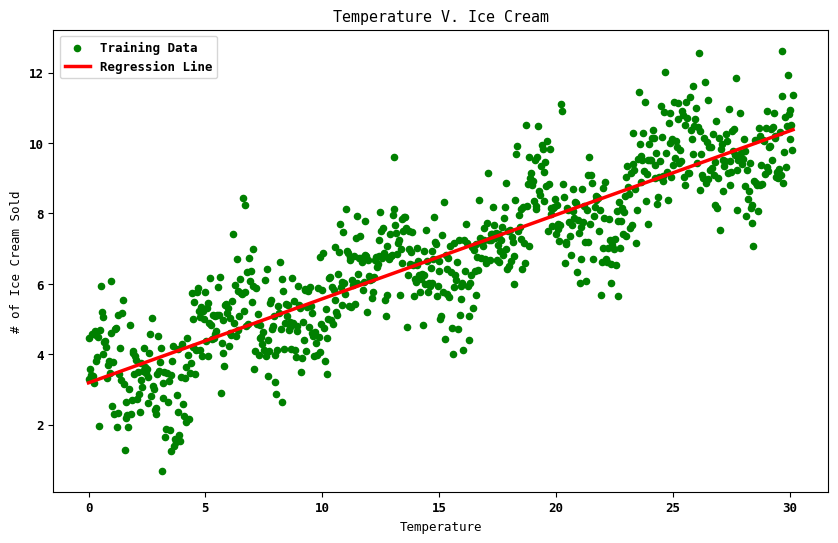

In [10]:
X = df["Temperature"].to_numpy()
y = df["Icecream"].to_numpy()

y_pred = model.predict(X.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', s=20,  marker='o', label='Training Data')
plt.plot(X, y_pred, color='red', linewidth=2.5, label='Regression Line')

plt.xlabel('Temperature')
plt.ylabel('# of Ice Cream Sold')
plt.title('Temperature V. Ice Cream')
plt.legend()

plt.show()

To check if our assumption that their is a linear trend in the data is true we can come up with the following hypothesis. 
H₀: β̂1 = 0 (No linear trend)
H₁: β̂1 != 0 (there is a linear trend)

To this assumption we need the OLS Regression Results.
What we are looking for is the P value of x1.
we have a p value of 0.00,
since the p value is less then the signifance level of (0.05) so we can reject the null hypothesis
because we rejected the null hyposthesis we can conclude that β̂1 != 0
which means their is a linear trend in the data

The same can be done with β̂0, where we can conclude wheter it is zero or not.
H₀: β̂0 = 0
H₁: β̂0 != 0

It isn't zero because the p value is less then the signifance level,
rejecting the null hypothesis β̂0 = 0.

In [11]:
constant_x = sm.add_constant(X)

model = sm.OLS(y,constant_x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2840.
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.30e-265
Time:                        09:25:17   Log-Likelihood:                -1212.4
No. Observations:                 800   AIC:                             2429.
Df Residuals:                     798   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1910      0.078     40.962      0.0